## 파이썬을 활용한 수치형 자료의 시각화 

- 시각화를 위한 파이썬 환경 준비 작업 

- 예제 1. 아파트 실거래가 데이터 
- 예제 2. 엔스콤 사인방 데이터 

In [1]:
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Window의 경우 그래프의 한글 환경설정 
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# Mac의 경우 그래프의 한글 환경설정 
# matplotlib.rc('font', family='AppleGothic') 

### 아파트 실거래가 데이터의 시각화 

In [3]:
import pandas as pd
apt = pd.read_excel('data/아파트_실거래가_서울.xlsx')
apt.rename(columns = {'전용면적(㎡)' : '면적', '거래금액(만원)' : '가격'}, inplace = True)
apt['단가'] = apt.가격 / apt.면적

- 히스토그램

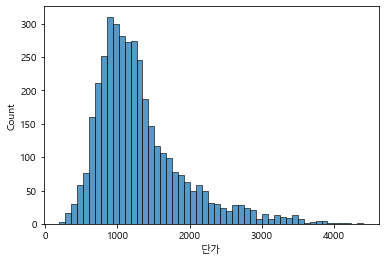

In [4]:
sns.histplot(apt.단가)
plt.show()

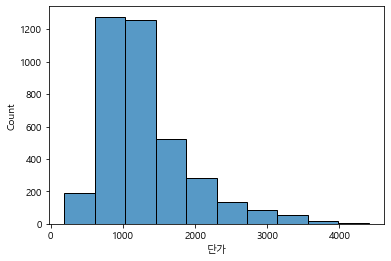

In [5]:
sns.histplot(apt.단가, bins = 10) # 구간의 수를 인위로 정할 수 있음 
plt.show()

$\Rightarrow$ 단위면적당 가격의 분포를 보여주는 히스토그램임. **오른쪽에 긴 꼬리가 있는 분포**임을 한눈에 볼 수 있음 

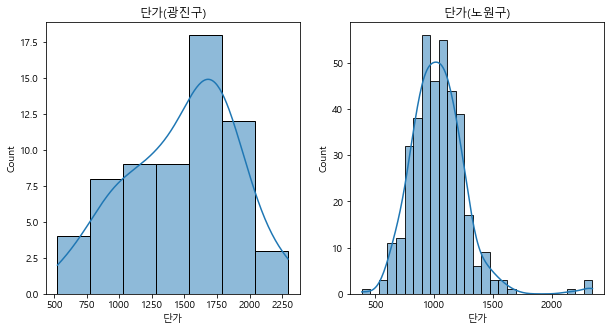

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.histplot(apt.단가[apt.구 == '광진구'], ax = ax[0], kde=True)
sns.histplot(apt.단가[apt.구 == '노원구'], ax = ax[1], kde=True)

ax[0].set_title("단가(광진구)")
ax[1].set_title("단가(노원구)")

plt.show()

$\Rightarrow$ **광진구**의 경우 **왼쪽으로 꼬리가 있는 왜도가 음수인 분포**임을 알 수 있고, **노원구**의 경우는 반대로 **오른쪽으로 꼬리가 있는 왜도가 양수인 분포**임을 알 수 있음

$\Rightarrow$ 코드에서 kde=True는 커널밀도추정함수를 히스토그램에 추가하는 옵션이고 분포의 모양에 대한 대략적인 모양을 스무드한 커브로 알 수 있어서 추가하기도 함. 

- 상자그림 

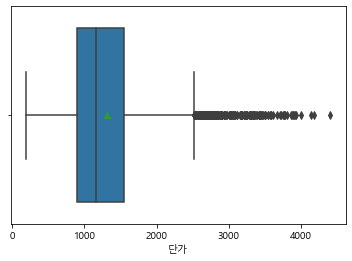

In [9]:
sns.boxplot(data=apt, x='단가', showmeans=True)
plt.show()

$\Rightarrow$ 위에서 확인했던 것처럼 단위면적당 가격은 **이상치들이 오른쪽에 위치**하고 있는 오른쪽에 긴 꼬리가 있는 분포임을 한눈에 볼 수 있음. 히스토그램에서는 이상치인지 여부는 알 수 없지만 상자그림에서는 **이상치와 평균, 중위수 등의 기술통계량에 대한 추가적인 정보도 얻을 수 있음**  

- 산점도 

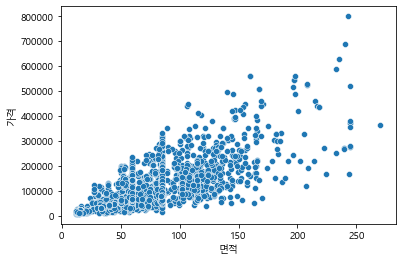

In [10]:
sns.scatterplot(data=apt, x='면적', y='가격')
plt.show()

$\Rightarrow$ 면적이 증가할수록 가격이 증가하는 모습, 즉 **우상향하는 트렌드**를 보여줌. **양의 상관관계**를 가지는 관계이며 이는 앞에서도 확인 했었음  

- 산점도 행렬 

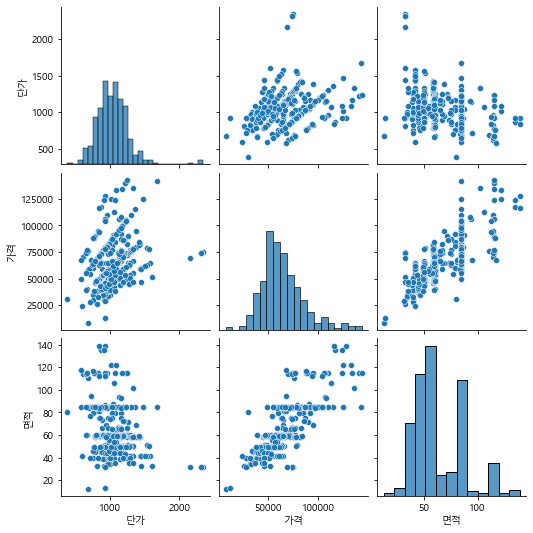

In [11]:
nw = apt.loc[apt.구== '노원구', ['구', '단가', '가격', '면적']]

sns.pairplot(nw)
plt.show()

$\Rightarrow$ 단가, 가격, 면적 변수들의 관계를 한눈에 볼 수 있음 

### 앤스콤 사인방을 활용한 자료의 시각화

In [12]:
anscombe = sns.load_dataset("anscombe")
anscombe.shape

(44, 3)

In [13]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [14]:
anscombe.dataset.value_counts()

I      11
II     11
III    11
IV     11
Name: dataset, dtype: int64

In [15]:
anscombe.groupby('dataset').mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


In [16]:
anscombe.groupby('dataset').std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


In [17]:
anscombe.groupby('dataset').corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

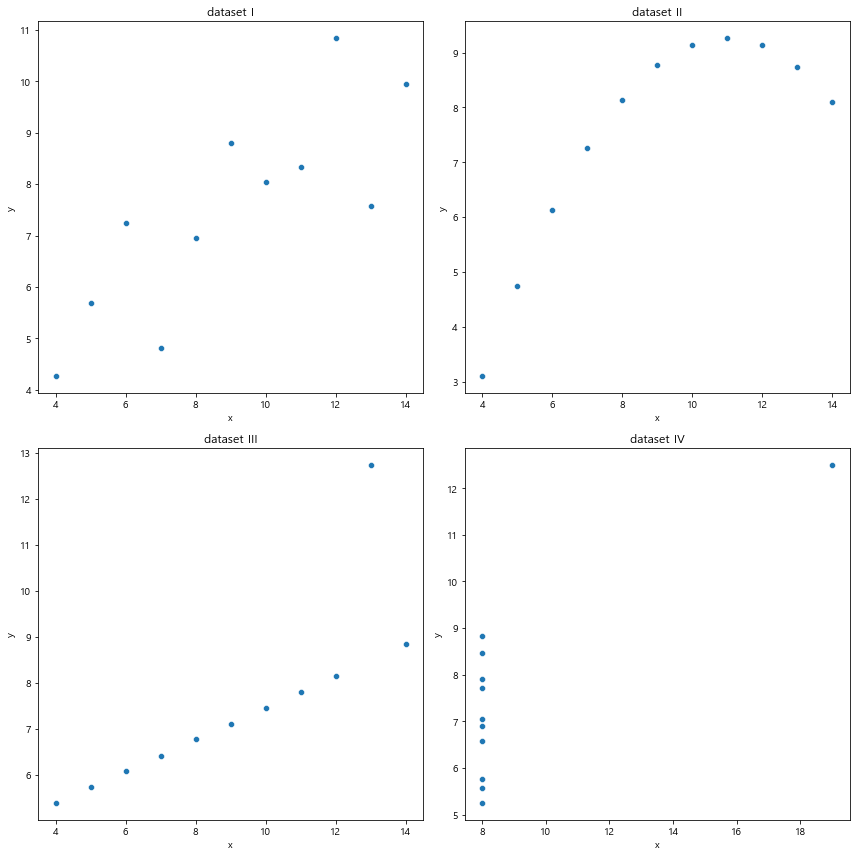

In [20]:
ans1 = anscombe[anscombe.dataset =='I']
ans2 = anscombe[anscombe.dataset =='II']
ans3 = anscombe[anscombe.dataset =='III']
ans4 = anscombe[anscombe.dataset =='IV']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

sns.scatterplot(x='x', y='y', data=ans1, ax=axs[0,0])
sns.scatterplot(x='x', y='y', data=ans2, ax=axs[0,1])
sns.scatterplot(x='x', y='y', data=ans3, ax=axs[1,0])
sns.scatterplot(x='x', y='y', data=ans4, ax=axs[1,1])

axs[0,0].set_title("dataset I")
axs[0,1].set_title("dataset II")
axs[1,0].set_title("dataset III")
axs[1,1].set_title("dataset IV")

fig.tight_layout() # 그래프들 간의 간격 띄우기 위함
plt.show()